In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('sentiment.csv')
df

MATCH_Subject  MATCH_REGION_CODE  PERSONID Applicant_Pool  \
0             ARTS                435    106910              A   
1             ARTS                422    107270              B   
2             ARTS                435    100187              B   
3             ARTS                435    106903              B   
4        BILINGUAL                440    109014              A   
...            ...                ...       ...            ...   
4042          SPED                448    109667              B   
4043          SPED                417    105647              A   
4044          SPED                403    100672              A   
4045          SPED                423    107740              A   
4046          SPED                423    108130              B   

     UNIV_Selectivity                       UNIV_Major  Candidate_Strength  \
0      More Selective                       Film/Video            0.685519   
1           Selective                          Theater            0.743575   
2     Least Selective                         Religion            0.750299   
3      More Selective                   Communications            0.796112   
4     Least Selective                       Psychology            0.796421   
...               ...                              ...                 ...   
4042  Least Selective           Education (elementary)            0.755024   
4043   Most Selective                          History            0.674346   
4044   Most Selective                      Linguistics            0.809678   
4045  Least Selective  International Studies/Relations            0.812534   
4046   Less Selective                        Marketing            0.716140   

     Low_IncomeComm_Ex Low_IncomeComm_Ex_L  Mission_KNWL_ALNMT  FastApp  \
0                    Y              LEVEL3                 3.0        0   
1                    N              LEVEL1                 3.0        0   
2                    N              LEVEL3                 4.0        0   
3                    Y              LEVEL2                 3.5        0   
4                    Y              LEVEL3                 4.5        0   
...                ...                 ...                 ...      ...   
4042                 Y              LEVEL3                 5.0        0   
4043                 Y              LEVEL3                 4.5        0   
4044                 Y              LEVEL3                 4.0        1   
4045                 Y              LEVEL3                 4.0        0   
4046                 Y              LEVEL3                 4.0        0   

      ESSAY_Length  ESSAY_T1  ESSAY_T2  ESSAY_T3  ESSAY_T4  ESSAY_T5  \
0             2365  0.001962  0.001962  0.419160  0.001963  0.001963   
1             1671  0.002709  0.002709  0.530529  0.098731  0.002709   
2             1701  0.003135  0.003134  0.003134  0.003134  0.247772   
3             1591  0.708005  0.002704  0.002704  0.002704  0.002704   
4             1742  0.048345  0.002566  0.002565  0.269369  0.002566   
...            ...       ...       ...       ...       ...       ...   
4042          1973  0.049898  0.001941  0.340759  0.001940  0.001941   
4043          2693  0.396244  0.112962  0.344975  0.001431  0.001431   
4044          2442  0.356939  0.088349  0.001564  0.043021  0.142429   
4045          1914  0.002329  0.310157  0.002329  0.002328  0.163406   
4046          1996  0.002223  0.142469  0.002223  0.002223  0.002223   

      ESSAY_T6  ESSAY_T7  ESSAY_T8  ESSAY_T9  ESSAY_T10  MATCH_is_home_region  \
0     0.565139  0.001963  0.001962  0.001963   0.001963                  True   
1     0.314035  0.002709  0.002709  0.040450   0.002709                  True   
2     0.385825  0.238915  0.003134  0.108682   0.003134                 False   
3     0.002704  0.002704  0.002704  0.002704   0.270362                  True   
4     0.197494  0.246261  0.002565  0.002565   0.225703                  True   
...        ...       ..

## Removing unnecessary features

In [3]:
df.drop(labels=['MATCH_REGION_CODE','PERSONID'],axis=1,inplace=True)
df

MATCH_Subject Applicant_Pool UNIV_Selectivity  \
0             ARTS              A   More Selective   
1             ARTS              B        Selective   
2             ARTS              B  Least Selective   
3             ARTS              B   More Selective   
4        BILINGUAL              A  Least Selective   
...            ...            ...              ...   
4042          SPED              B  Least Selective   
4043          SPED              A   Most Selective   
4044          SPED              A   Most Selective   
4045          SPED              A  Least Selective   
4046          SPED              B   Less Selective   

                           UNIV_Major  Candidate_Strength Low_IncomeComm_Ex  \
0                          Film/Video            0.685519                 Y   
1                             Theater            0.743575                 N   
2                            Religion            0.750299                 N   
3                      Communications            0.796112                 Y   
4                          Psychology            0.796421                 Y   
...                               ...                 ...               ...   
4042           Education (elementary)            0.755024                 Y   
4043                          History            0.674346                 Y   
4044                      Linguistics            0.809678                 Y   
4045  International Studies/Relations            0.812534                 Y   
4046                        Marketing            0.716140                 Y   

     Low_IncomeComm_Ex_L  Mission_KNWL_ALNMT  FastApp  ESSAY_Length  ESSAY_T1  \
0                 LEVEL3                 3.0        0          2365  0.001962   
1                 LEVEL1                 3.0        0          1671  0.002709   
2                 LEVEL3                 4.0        0          1701  0.003135   
3                 LEVEL2                 3.5        0          1591  0.708005   
4                 LEVEL3                 4.5        0          1742  0.048345   
...                  ...                 ...      ...           ...       ...   
4042              LEVEL3                 5.0        0          1973  0.049898   
4043              LEVEL3                 4.5        0          2693  0.396244   
4044              LEVEL3                 4.0        1          2442  0.356939   
4045              LEVEL3                 4.0        0          1914  0.002329   
4046              LEVEL3                 4.0        0          1996  0.002223   

      ESSAY_T2  ESSAY_T3  ESSAY_T4  ESSAY_T5  ESSAY_T6  ESSAY_T7  ESSAY_T8  \
0     0.001962  0.419160  0.001963  0.001963  0.565139  0.001963  0.001962   
1     0.002709  0.530529  0.098731  0.002709  0.314035  0.002709  0.002709   
2     0.003134  0.003134  0.003134  0.247772  0.385825  0.238915  0.003134   
3     0.002704  0.002704  0.002704  0.002704  0.002704  0.002704  0.002704   
4     0.002566  0.002565  0.269369  0.002566  0.197494  0.246261  0.002565   
...        ...       ...       ...       ...       ...       ...       ...   
4042  0.001941  0.340759  0.001940  0.001941  0.485069  0.112630  0.001941   
4043  0.112962  0.344975  0.001431  0.001431  0.001431  0.001431  0.001430   
4044  0.088349  0.001564  0.043021  0.142429  0.361440  0.001564  0.001565   
4045  0.310157  0.002329  0.002328  0.163406  0.434119  0.002328  0.002328   
4046  0.142469  0.002223  0.002223  0.002223  0.429088  0.106211  0.002223   

      ESSAY_T9  ESSAY_T10  MATCH_is_home_region  MATCH_is_UNIV_Region  \
0     0.001963   0.001963                  True                  True   
1     0.040450   0.002709                  True                 False   
2     0.108682   0.003134                 False                 False   
3     0.002704   0.270362                  True                  True   
4     0.002565   0.225703                  True                 False   
...        ...        ...                   ...            

## Checking column types and values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MATCH_Subject            4047 non-null   object 
 1   Applicant_Pool           4047 non-null   object 
 2   UNIV_Selectivity         4047 non-null   object 
 3   UNIV_Major               4047 non-null   object 
 4   Candidate_Strength       4047 non-null   float64
 5   Low_IncomeComm_Ex        4047 non-null   object 
 6   Low_IncomeComm_Ex_L      4047 non-null   object 
 7   Mission_KNWL_ALNMT       4047 non-null   float64
 8   FastApp                  4047 non-null   int64  
 9   ESSAY_Length             4047 non-null   int64  
 10  ESSAY_T1                 4047 non-null   float64
 11  ESSAY_T2                 4047 non-null   float64
 12  ESSAY_T3                 4047 non-null   float64
 13  ESSAY_T4                 4047 non-null   float64
 14  ESSAY_T5                

# Identifying Categorical and Non-Categorical Features¶

In [5]:
int_float_cols = []
obj_cols = []

for x in df.columns:
    if(df[x].dtype==object):
        obj_cols.append(x)
    else:
        int_float_cols.append(x)

print("Following are integer / float columns :-")
print(int_float_cols)
print("\n\n")
print("Following are categorical columns :- ")
print(obj_cols)

Following are integer / float columns :-
['Candidate_Strength', 'Mission_KNWL_ALNMT', 'FastApp', 'ESSAY_Length', 'ESSAY_T1', 'ESSAY_T2', 'ESSAY_T3', 'ESSAY_T4', 'ESSAY_T5', 'ESSAY_T6', 'ESSAY_T7', 'ESSAY_T8', 'ESSAY_T9', 'ESSAY_T10', 'MATCH_is_home_region', 'MATCH_is_UNIV_Region', 'MATCH_is_Current_Region', 'MATCH_Region_Pref_Level', 'MATCH_Region_Pref_Rank', 'MATCH_Subject_Prefer', 'CERT_COST', 'RENT_2_shared', 'RENT_1_single', 'Y1_MIN_SAL', 'Y1_MAX_SAL', 'Y2_MIN_SAL', 'Y2_MAX_SAL', 'SEX_RATIO_.M', 'AGE_20_24', 'AGE_25_29', 'AGE_30_34', 'AGE_35_39', 'AGE_40_44', 'AGE_45_49', 'RACE_NON_WHITE', 'RACE_Two_or_more', 'ED_ATN_Less_9G', 'ED_ATN_HS_p', 'ED_ATN_Bachelor_p', 'TEMP_MAX_JAN', 'TEMP_MAX_FEB', 'TEMP_MAX_MAR', 'TEMP_MAX_APR', 'TEMP_MAX_MAY', 'TEMP_MAX_JUN', 'TEMP_MAX_JUL', 'TEMP_MAX_AUG', 'TEMP_MAX_SEP', 'TEMP_MAX_OCT', 'TEMP_MAX_NOV', 'TEMP_MAX_DEC', 'TEMP_MAX_ANN', 'TEMP_MIN_JAN', 'TEMP_MIN_FEB', 'TEMP_MIN_MAR', 'TEMP_MIN_APR', 'TEMP_MIN_MAY', 'TEMP_MIN_JUN', 'TEMP_MIN_JUL', 'TEMP

## Manipulating Non-Categorical Features# 

In [6]:
df_int_float_cols = df[int_float_cols]
df_int_float_cols

Candidate_Strength  Mission_KNWL_ALNMT  FastApp  ESSAY_Length  ESSAY_T1  \
0               0.685519                 3.0        0          2365  0.001962   
1               0.743575                 3.0        0          1671  0.002709   
2               0.750299                 4.0        0          1701  0.003135   
3               0.796112                 3.5        0          1591  0.708005   
4               0.796421                 4.5        0          1742  0.048345   
...                  ...                 ...      ...           ...       ...   
4042            0.755024                 5.0        0          1973  0.049898   
4043            0.674346                 4.5        0          2693  0.396244   
4044            0.809678                 4.0        1          2442  0.356939   
4045            0.812534                 4.0        0          1914  0.002329   
4046            0.716140                 4.0        0          1996  0.002223   

      ESSAY_T2  ESSAY_T3  ESSAY_T4  ESSAY_T5  ESSAY_T6  ESSAY_T7  ESSAY_T8  \
0     0.001962  0.419160  0.001963  0.001963  0.565139  0.001963  0.001962   
1     0.002709  0.530529  0.098731  0.002709  0.314035  0.002709  0.002709   
2     0.003134  0.003134  0.003134  0.247772  0.385825  0.238915  0.003134   
3     0.002704  0.002704  0.002704  0.002704  0.002704  0.002704  0.002704   
4     0.002566  0.002565  0.269369  0.002566  0.197494  0.246261  0.002565   
...        ...       ...       ...       ...       ...       ...       ...   
4042  0.001941  0.340759  0.001940  0.001941  0.485069  0.112630  0.001941   
4043  0.112962  0.344975  0.001431  0.001431  0.001431  0.001431  0.001430   
4044  0.088349  0.001564  0.043021  0.142429  0.361440  0.001564  0.001565   
4045  0.310157  0.002329  0.002328  0.163406  0.434119  0.002328  0.002328   
4046  0.142469  0.002223  0.002223  0.002223  0.429088  0.106211  0.002223   

      ESSAY_T9  ESSAY_T10  MATCH_is_home_region  MATCH_is_UNIV_Region  \
0     0.001963   0.001963                  True                  True   
1     0.040450   0.002709                  True                 False   
2     0.108682   0.003134                 False                 False   
3     0.002704   0.270362                  True                  True   
4     0.002565   0.225703                  True                 False   
...        ...        ...                   ...                   ...   
4042  0.001941   0.001941                  True                  True   
4043  0.137236   0.001430                  True                  True   
4044  0.001565   0.001564                  True                  True   
4045  0.078348   0.002328                 False                 False   
4046  0.002223   0.308892                  True                  True   

      MATCH_is_Current_Region  MATCH_Region_Pref_Level  \
0                        True                        1   
1                        True                        1   
2                       False                        1   
3                        True                        1   
4                        True                        1   
...                       ...                      ...   
4042                     True                        1   
4043                     True                        1   
4044                     True                        1   
4045                    False                        1   
4046                     True                        1   

      MATCH_Region_Pref_Rank  MATCH_Subject_Prefer  CERT_COST  RENT_2_shared  \
0                          1                     1        100            300   
1                          1                     3       5000           1000   
2                          1                     1        100            300   
3                          4                     1        100            300   
4                          1                     1       1925            450   
...                      ...              

In [7]:
# pearson correlation matrix
df_int_float_correlation = df_int_float_cols.corr()

df_int_float_correlation

Candidate_Strength  Mission_KNWL_ALNMT   FastApp  \
Candidate_Strength                 1.000000            0.385295 -0.012161   
Mission_KNWL_ALNMT                 0.385295            1.000000 -0.029042   
FastApp                           -0.012161           -0.029042  1.000000   
ESSAY_Length                       0.016277            0.055103 -0.184493   
ESSAY_T1                           0.034390            0.094944 -0.067392   
ESSAY_T2                           0.068403            0.047220 -0.075903   
ESSAY_T3                          -0.045023           -0.133869 -0.010299   
ESSAY_T4                           0.002717           -0.016676  0.007023   
ESSAY_T5                          -0.031321           -0.111006  0.039795   
ESSAY_T6                          -0.027903            0.098070 -0.050094   
ESSAY_T7                           0.012491           -0.005028  0.044461   
ESSAY_T8                          -0.057325           -0.040717  0.103762   
ESSAY_T9                           0.006723           -0.109705  0.002903   
ESSAY_T10                          0.010367            0.033709  0.088305   
MATCH_is_home_region              -0.030842            0.064138  0.000082   
MATCH_is_UNIV_Region              -0.000256            0.055817  0.017367   
MATCH_is_Current_Region           -0.002201            0.071483  0.021337   
MATCH_Region_Pref_Level           -0.001780            0.002194  0.015529   
MATCH_Region_Pref_Rank             0.023366            0.009025  0.023566   
MATCH_Subject_Prefer               0.008630           -0.007941 -0.000445   
CERT_COST                         -0.014883           -0.013866 -0.002812   
RENT_2_shared                     -0.014674            0.013989  0.005683   
RENT_1_single                     -0.015962            0.015053 -0.001647   
Y1_MIN_SAL                         0.001224            0.032190 -0.026833   
Y1_MAX_SAL                        -0.004425            0.001978 -0.018718   
Y2_MIN_SAL                        -0.004403            0.035669 -0.023837   
Y2_MAX_SAL                        -0.014340           -0.000993 -0.018330   
SEX_RATIO_.M                      -0.005411            0.022804 -0.003161   
AGE_20_24                          0.033869            0.015533 -0.016655   
AGE_25_29                          0.025812            0.031103 -0.026485   
AGE_30_34                         -0.002233            0.012279 -0.023125   
AGE_35_39                         -0.006937            0.008204 -0.003701   
AGE_40_44                         -0.012095            0.004579 -0.007482   
AGE_45_49                          0.010975            0.020256 -0.006274   
RACE_NON_WHITE                    -0.020956           -0.000028 -0.000064   
RACE_Two_or_more                  -0.032635           -0.002662  0.018573   
ED_ATN_Less_9G                    -0.010564            0.066780 -0.020903   
ED_ATN_HS_p                       -0.025876           -0.050968  0.020770   
ED_ATN_Bachelor_p                 -0.020903           -0.033101 -0.002855   
TEMP_MAX_JAN                      -0.018390            0.040613  0.001956   
TEMP_MAX_FEB                      -0.013626            0.040576 -0.000261   
TEMP_MAX_MAR                      -0.005687            0.040747  0.001102   
TEMP_MAX_APR                       0.000412            0.039440  0.006438   
TEMP_MAX_MAY                       0.010362            0.038207  0.008804   
TEMP_MAX_JUN                       0.019900            0.032798  0.009643   
TEMP_MAX_JUL                       0.022188            0.031555  0.011729   
TEMP_MAX_AUG                       0.018359            0.033660  0.011699   
TEMP_MAX_SEP                       0.005148            0.039060  0.009782   
TEMP_MAX_OCT                      -0.010067            0.037985  0.006036   
TEMP_MAX_NOV                      -0.017957            0.035900  0.007016   
TEMP_MAX_DEC                      -0.020358            0.037361  0.004824   
TEMP_MAX_ANN         

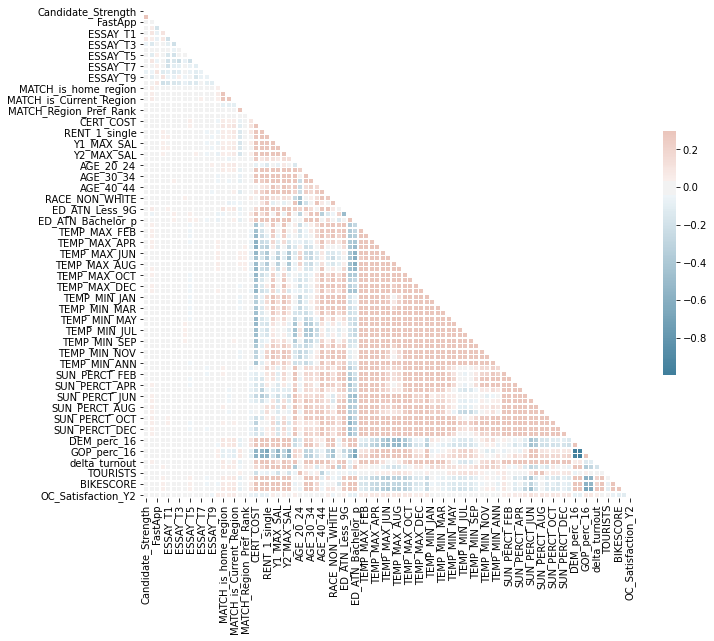

In [8]:
# Creating a general correlation matrix of overall dataframe (non-categorical)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_int_float_correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_int_float_correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# selecting important features based on pearson correlation

cols_to_be_selected_non_categorical = []
all_cols = df_int_float_correlation.columns
index = 0;

for x in df_int_float_correlation['OC_Satisfaction_Y2'].tolist():
    if(x >= -0.1 and x <=0.1):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected_non_categorical.append(all_cols[index])
    index += 1
    
cols_to_be_selected_non_categorical

['CERT_COST',
 'ED_ATN_Bachelor_p',
 'TEMP_MAX_MAY',
 'TEMP_MAX_JUN',
 'TEMP_MAX_JUL',
 'TEMP_MAX_AUG',
 'TEMP_MAX_SEP',
 'SUN_PERCT_JUN',
 'TRANISTCORE',
 'OC_Satisfaction_Y2']

# Manipulating Categorical Features

In [10]:
df_cat_cols = df[obj_cols]

df_cat_cols

MATCH_Subject Applicant_Pool UNIV_Selectivity  \
0             ARTS              A   More Selective   
1             ARTS              B        Selective   
2             ARTS              B  Least Selective   
3             ARTS              B   More Selective   
4        BILINGUAL              A  Least Selective   
...            ...            ...              ...   
4042          SPED              B  Least Selective   
4043          SPED              A   Most Selective   
4044          SPED              A   Most Selective   
4045          SPED              A  Least Selective   
4046          SPED              B   Less Selective   

                           UNIV_Major Low_IncomeComm_Ex Low_IncomeComm_Ex_L  \
0                          Film/Video                 Y              LEVEL3   
1                             Theater                 N              LEVEL1   
2                            Religion                 N              LEVEL3   
3                      Communications                 Y              LEVEL2   
4                          Psychology                 Y              LEVEL3   
...                               ...               ...                 ...   
4042           Education (elementary)                 Y              LEVEL3   
4043                          History                 Y              LEVEL3   
4044                      Linguistics                 Y              LEVEL3   
4045  International Studies/Relations                 Y              LEVEL3   
4046                        Marketing                 Y              LEVEL3   

              MATCH_School_Type       MATCH_Grade_Level Population_size  \
0                  Missing Data                       6      very small   
1                Charter School                  Middle        big city   
2     Traditional Public School  LOWER ELEMENTARY (1-2)      very small   
3     Traditional Public School                  MIDDLE      very small   
4                Charter School  LOWER ELEMENTARY (1-2)           small   
...                         ...                     ...             ...   
4042  Traditional Public School  UPPER ELEMENTARY (3-5)           small   
4043  Traditional Public School                    High        big city   
4044             Charter School  Upper Elementary (3-5)            city   
4045  Traditional Public School                  Middle        big city   
4046  Traditional Public School  Upper Elementary (3-5)        big city   

     SUBJECT_Teach_Mapping  
0               Humanities  
1               Humanities  
2               Humanities  
3               Humanities  
4          ForeignLanguage  
...                    ...  
4042             GeneralEd  
4043             GeneralEd  
4044             GeneralEd  
4045             GeneralEd  
4046             GeneralEd  

[4047 rows x 10 columns]

In [11]:
# using hot one encoding technique to convert all categorical values into non-categorical values.

def oneHotEncoding_with_names(columnName):
    
    temp_df = pd.get_dummies(df_cat_cols[columnName],drop_first=True)
    for x in temp_df.columns:
        temp_df.rename(columns={x:columnName+'_'+str(x)},inplace=True)
    
    for x in temp_df.columns:
        df_cat_cols[x] = temp_df[x]
    
    df_cat_cols.drop(labels=columnName,axis=1,inplace=True)
    return df_cat_cols

for y in df_cat_cols.columns:
    oneHotEncoding_with_names(y)

df_cat_cols['OC_Satisfaction_Y2'] = df['OC_Satisfaction_Y2']
df_cat_cols

C:\Users\S.M.Ammar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MATCH_Subject_BILINGUAL  MATCH_Subject_BIOLOGY  MATCH_Subject_CHEMISTRY  \
0                           0                      0                        0   
1                           0                      0                        0   
2                           0                      0                        0   
3                           0                      0                        0   
4                           1                      0                        0   
...                       ...                    ...                      ...   
4042                        0                      0                        0   
4043                        0                      0                        0   
4044                        0                      0                        0   
4045                        0                      0                        0   
4046                        0                      0                        0   

      MATCH_Subject_ELEMENTARY  MATCH_Subject_ENGLISH  MATCH_Subject_ESL  \
0                            0                      0                  0   
1                            0                      0                  0   
2                            0                      0                  0   
3                            0                      0                  0   
4                            0                      0                  0   
...                        ...                    ...                ...   
4042                         0                      0                  0   
4043                         0                      0                  0   
4044                         0                      0                  0   
4045                         0                      0                  0   
4046                         0                      0                  0   

      MATCH_Subject_HISTORY  MATCH_Subject_HSGENSCIENCE  MATCH_Subject_HSMATH  \
0                         0                           0                     0   
1                         0                           0                     0   
2                         0                           0                     0   
3                         0                           0                     0   
4                         0                           0                     0   
...                     ...                         ...                   ...   
4042                      0                           0                     0   
4043                      0                           0                     0   
4044                      0                           0                     0   
4045                      0                           0                     0   
4046                      0                           0                     0   

      MATCH_Subject_MSGENERALIST  MATCH_Subject_MSGENSCIENCE  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
4042                           0                           0   
4043                           0                           0   
4044                           0                           0   
4045                           0                           0   
4046                           0                           0   

      MATCH_Subject_MSMATH  MATCH_Subject_MUSIC  MATCH_Subject_PHYSICS  \
0                        0                    0                      0   
1                        0                    0                      0   
2                        0                    0                      0   
3                        0                    0                      0   
4       

In [12]:
# pearson correlation matrix
df_cat_cols_correlation = df_cat_cols.corr()
df_cat_cols_correlation

MATCH_Subject_BILINGUAL  \
MATCH_Subject_BILINGUAL                                            1.000000   
MATCH_Subject_BIOLOGY                                             -0.028871   
MATCH_Subject_CHEMISTRY                                           -0.019638   
MATCH_Subject_ELEMENTARY                                          -0.081621   
MATCH_Subject_ENGLISH                                             -0.055019   
MATCH_Subject_ESL                                                 -0.023647   
MATCH_Subject_HISTORY                                             -0.030640   
MATCH_Subject_HSGENSCIENCE                                        -0.044005   
MATCH_Subject_HSMATH                                              -0.046707   
MATCH_Subject_MSGENERALIST                                        -0.032424   
MATCH_Subject_MSGENSCIENCE                                        -0.032810   
MATCH_Subject_MSMATH                                              -0.031344   
MATCH_Subject_MUSIC                                               -0.003391   
MATCH_Subject_PHYSICS                                             -0.006788   
MATCH_Subject_PREK                                                -0.030232   
MATCH_Subject_SPANISH                                             -0.022070   
MATCH_Subject_SPED                                                -0.069990   
Applicant_Pool_B                                                  -0.003594   
UNIV_Selectivity_Less Selective                                   -0.013814   
UNIV_Selectivity_More Selective                                   -0.022389   
UNIV_Selectivity_More selective                                   -0.003391   
UNIV_Selectivity_Most Selective                                   -0.015088   
UNIV_Selectivity_Selective                                        -0.008120   
UNIV_Major_Advertising                                            -0.006349   
UNIV_Major_Aerospace Engineering                                  -0.002398   
UNIV_Major_African Studies                                        -0.002398   
UNIV_Major_African-American Studies                               -0.008986   
UNIV_Major_Agricultural Science                                   -0.004797   
UNIV_Major_American Studies                                       -0.010194   
UNIV_Major_Animal Science                                          0.033547   
UNIV_Major_Anthropology                                           -0.021241   
UNIV_Major_Archaeology                                            -0.002398   
UNIV_Major_Architecture                                           -0.004154   
UNIV_Major_Art                                                    -0.008986   
UNIV_Major_Art Education                                          -0.002398   
UNIV_Major_Art History                                            -0.007591   
UNIV_Major_Asian Studies                                          -0.004154   
UNIV_Major_Behavioral Science                                     -0.003391   
UNIV_Major_Biblical Studies                                       -0.002398   
UNIV_Major_Biochemistry                                           -0.011780   
UNIV_Major_Biology                                                -0.025097   
UNIV_Major_Biomedical Engineering                                 -0.008986   
UNIV_Major_Biophysics                                             -0.002398   
UNIV_Major_Biopsychology                                          -0.004154   
UNIV_Major_Botany                                                 -0.002398   
UNIV_Major_Business                                               -0.012139   
UNIV_Major_Chemical Engineering                                   -0.006788   
UNIV_Major_Chemistry                                              -0.013616   
UNIV_Major_Chicano(a) Studies                                      0.041829   
UNIV_Major_Child Development                                       0.013777   
UNIV_Major_Child Studie

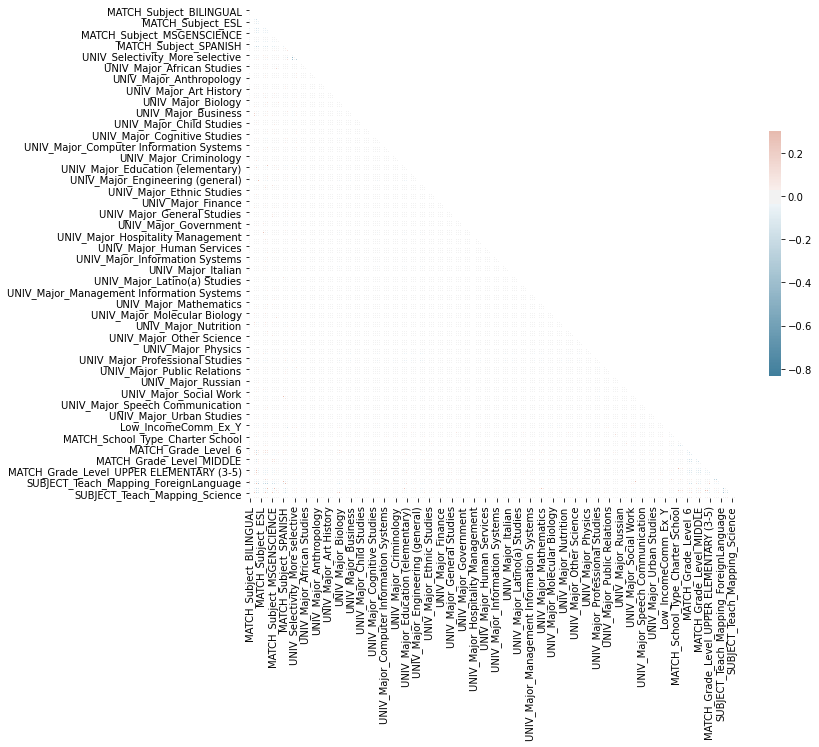

In [13]:
# Creating a general correlation matrix of overall dataframe (categorical)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_cat_cols_correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_cat_cols_correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# selecting important features based on pearson correlation

cols_to_be_selected_categorical = []
all_cols = df_cat_cols_correlation.columns
index = 0;

for x in df_cat_cols_correlation['OC_Satisfaction_Y2'].tolist():
    if(x >= -0.06 and x <=0.06):
        #neglecting the feature / column
        pass
    else:
        cols_to_be_selected_categorical.append(all_cols[index])
    index += 1
    
cols_to_be_selected_categorical

['MATCH_Subject_PREK',
 'UNIV_Major_Biophysics',
 'UNIV_Major_Ethnic Studies',
 'MATCH_Grade_Level_HIGH',
 'SUBJECT_Teach_Mapping_OtherSubjects',
 'OC_Satisfaction_Y2']

## Building Final Dataframe

In [15]:
final_df = pd.DataFrame()
final_df['CERT_COST'] = df['CERT_COST']
final_df['ED_ATN_Bachelor_p'] = df['ED_ATN_Bachelor_p']
final_df['TEMP_MAX_MAY'] = df['TEMP_MAX_MAY']
final_df['TEMP_MAX_JUN'] = df['TEMP_MAX_JUN']
final_df['TEMP_MAX_JUL'] = df['TEMP_MAX_JUL']
final_df['TEMP_MAX_AUG'] = df['TEMP_MAX_AUG']
final_df['TEMP_MAX_SEP'] = df['TEMP_MAX_SEP']
final_df['SUN_PERCT_JUN'] = df['SUN_PERCT_JUN']
final_df['TRANISTCORE'] = df['TRANISTCORE']
final_df['MATCH_Subject_PREK'] = df_cat_cols['MATCH_Subject_PREK']
final_df['UNIV_Major_Biophysics'] = df_cat_cols['UNIV_Major_Biophysics']
final_df['UNIV_Major_Ethnic Studies'] = df_cat_cols['UNIV_Major_Ethnic Studies']
final_df['MATCH_Grade_Level_HIGH'] = df_cat_cols['MATCH_Grade_Level_HIGH']
final_df['SUBJECT_Teach_Mapping_OtherSubjects'] = df_cat_cols['SUBJECT_Teach_Mapping_OtherSubjects']
final_df['OC_Satisfaction_Y2'] = df['OC_Satisfaction_Y2']

final_df

CERT_COST  ED_ATN_Bachelor_p  TEMP_MAX_MAY  TEMP_MAX_JUN  TEMP_MAX_JUL  \
0           100               32.3          84.0          89.8          92.1   
1          5000               51.4          71.3          80.6          85.5   
2           100               32.3          84.0          89.8          92.1   
3           100               32.3          84.0          89.8          92.1   
4          1925               22.3          87.8          95.5          94.7   
...         ...                ...           ...           ...           ...   
4042      10000               41.9          66.5          75.3          79.9   
4043       6348               41.2          74.5          78.1          83.1   
4044       6195               59.6          64.3          66.4          66.5   
4045       8750               51.4          70.8          79.3          84.1   
4046       8750               51.4          70.8          79.3          84.1   

      TEMP_MAX_AUG  TEMP_MAX_SEP  SUN_PERCT_JUN  TRANISTCORE  \
0             91.9          87.3             64    20.000000   
1             83.7          77.0             56    56.500000   
2             91.9          87.3             64    20.000000   
3             91.9          87.3             64    20.000000   
4             92.4          87.6             90     0.000000   
...            ...           ...            ...          ...   
4042          78.4          71.1             62    49.000000   
4043          84.4          83.1             63   100.000000   
4044          68.1          70.2             69    46.666667   
4045          82.6          75.2             56    99.000000   
4046          82.6          75.2             56    99.000000   

      MATCH_Subject_PREK  UNIV_Major_Biophysics  UNIV_Major_Ethnic Studies  \
0                      0                      0                          0   
1                      0                      0                          0   
2                      0                      0                          0   
3                      0                      0                          0   
4                      0                      0                          0   
...                  ...                    ...                        ...   
4042                   0                      0                          0   
4043                   0                      0                          0   
4044                   0                      0                          0   
4045                   0                      0                          0   
4046                   0                      0                          0   

      MATCH_Grade_Level_HIGH  SUBJECT_Teach_Mapping_OtherSubjects  \
0                          0                                    0   
1                          0                                    0   
2                          0                                    0   
3                          0                                    0   
4                          0                                    0   
...                      ...                                  ...   
4042                       0                                    0   
4043                       0                                    0   
4044                       0                                    0   
4045                       0                                    0   
4046                       0                                    0   

      OC_Satisfaction_Y2  
0                   6.25  
1                   7.00  
2                   4.00  
3                   7.00  
4                   7.00  
...                  ...  
4042                4.75  
4043                5.00  
4044                5.00  
4045                4.00  
4046                6.00  

[4047 rows x 15 columns]

In [16]:
# creating features and targets
col_length = len(final_df.columns) 
features = final_df.iloc[:,0:col_length-1]
target = final_df[['OC_Satisfaction_Y2']]

In [17]:
features

CERT_COST  ED_ATN_Bachelor_p  TEMP_MAX_MAY  TEMP_MAX_JUN  TEMP_MAX_JUL  \
0           100               32.3          84.0          89.8          92.1   
1          5000               51.4          71.3          80.6          85.5   
2           100               32.3          84.0          89.8          92.1   
3           100               32.3          84.0          89.8          92.1   
4          1925               22.3          87.8          95.5          94.7   
...         ...                ...           ...           ...           ...   
4042      10000               41.9          66.5          75.3          79.9   
4043       6348               41.2          74.5          78.1          83.1   
4044       6195               59.6          64.3          66.4          66.5   
4045       8750               51.4          70.8          79.3          84.1   
4046       8750               51.4          70.8          79.3          84.1   

      TEMP_MAX_AUG  TEMP_MAX_SEP  SUN_PERCT_JUN  TRANISTCORE  \
0             91.9          87.3             64    20.000000   
1             83.7          77.0             56    56.500000   
2             91.9          87.3             64    20.000000   
3             91.9          87.3             64    20.000000   
4             92.4          87.6             90     0.000000   
...            ...           ...            ...          ...   
4042          78.4          71.1             62    49.000000   
4043          84.4          83.1             63   100.000000   
4044          68.1          70.2             69    46.666667   
4045          82.6          75.2             56    99.000000   
4046          82.6          75.2             56    99.000000   

      MATCH_Subject_PREK  UNIV_Major_Biophysics  UNIV_Major_Ethnic Studies  \
0                      0                      0                          0   
1                      0                      0                          0   
2                      0                      0                          0   
3                      0                      0                          0   
4                      0                      0                          0   
...                  ...                    ...                        ...   
4042                   0                      0                          0   
4043                   0                      0                          0   
4044                   0                      0                          0   
4045                   0                      0                          0   
4046                   0                      0                          0   

      MATCH_Grade_Level_HIGH  SUBJECT_Teach_Mapping_OtherSubjects  
0                          0                                    0  
1                          0                                    0  
2                          0                                    0  
3                          0                                    0  
4                          0                                    0  
...                      ...                                  ...  
4042                       0                                    0  
4043                       0                                    0  
4044                       0                                    0  
4045                       0                                    0  
4046                       0                                    0  

[4047 rows x 14 columns]

In [18]:
target

OC_Satisfaction_Y2
0                   6.25
1                   7.00
2                   4.00
3                   7.00
4                   7.00
...                  ...
4042                4.75
4043                5.00
4044                5.00
4045                4.00
4046                6.00

[4047 rows x 1 columns]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
reg = LinearRegression()
model = cross_validate(reg,features,target,cv=100,scoring ='r2',return_estimator=True)
model

{'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(

In [20]:
reg = LinearRegression()
model = cross_validate(reg,features,target,cv=100,scoring ='neg_mean_absolute_error',return_estimator=True)
model

{'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(max_depth=2, random_state=0)
model = cross_validate(rfc,features,target,cv=100,scoring ='r2',return_estimator=True)
model

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

{'estimator': (RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestR

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(max_depth=2, random_state=0)
model = cross_validate(rfc,features,target,cv=100,scoring ='neg_mean_absolute_error',return_estimator=True)
model

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\S.M.Ammar\AppData\Loca

{'estimator': (RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestRegressor(max_depth=2, random_state=0),
  RandomForestR

In [48]:
# saving prediction model with mean squared error of 0.55

test_scores = np.absolute(model['test_score'])
minimum_value = np.amin(test_scores)
index = np.where(test_scores==minimum_value)
final_model = model['estimator'][index[0][0]]
import pickle
with open('OC_Satisfaction_Y2.pkl', 'wb') as fid:
    pickle.dump(final_model, fid)
print(minimum_value)

0.5588308611585004
